In [ ]:
# The objective of the following study is to analyse how the price of oil and gas affects the price of other 
# commodities like wheat, rice or soy among others

# I will use the pandas library to handle the data and matplotlib for visualization
# I will also use numpy for numerical operations 
# I will use seaborn for statistical data visualization
# I will use statsmodels for statistical modeling and regression analysis
# I will use the ols function from statsmodels to perform linear regression analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm


In [5]:
# Here I import the data from an excel file and observe the first 10 rows
comdata = pd.read_excel(r"C:/Users/User/Documents/Data projects/Commodity_data_clean.xlsx")
comdata.head(10)

,month,crude_petro,crude_brent,crude_dubai,crude_wti,coal_aus,coal_safrica,ngas_us,ngas_eur,ngas_jp,...,aluminum,iron_ore,copper,lead,tin,nickel,zinc,gold,platinum,silver
0,1960-01-01,1.63,1.63,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,...,511.471832,11.42,715.40,206.1,2180.4,1631.0,260.8,35.27,83.5,0.9137
1,1960-02-01,1.63,1.63,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,...,511.471832,11.42,728.19,203.7,2180.4,1631.0,244.9,35.27,83.5,0.9137
2,1960-03-01,1.63,1.63,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,...,511.471832,11.42,684.94,210.3,2173.8,1631.0,248.7,35.27,83.5,0.9137
3,1960-04-01,1.63,1.63,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,...,511.471832,11.42,723.11,213.6,2178.2,1631.0,254.6,35.27,83.5,0.9137
4,1960-05-01,1.63,1.63,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,...,511.471832,11.42,684.75,213.4,2162.7,1631.0,253.8,35.27,83.5,0.9137
5,1960-06-01,1.63,1.63,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,...,511.471832,11.42,691.59,202.4,2184.8,1631.0,249.8,35.27,83.5,0.9137
6,1960-07-01,1.63,1.63,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,...,511.471832,11.42,702.39,196.2,2248.7,1631.0,248.7,35.27,83.5,0.9137
7,1960-08-01,1.63,1.63,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,...,511.471832,11.42,675.94,195.3,2204.6,1631.0,241.0,35.27,83.5,0.9137
8,1960-09-01,1.63,1.63,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,...,511.471832,11.42,647.06,192.7,2226.7,1631.0,240.1,35.27,83.5,0.9137
9,1960-10-01,1.63,1.63,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,...,511.471832,11.42,612.66,185.2,2226.7,1631.0,242.3,35.27,83.5,0.9137


In [6]:
# Convert 'month' to datetime
comdata['month'] = pd.to_datetime(comdata['month'])

# Set 'month' as the index
comdata = comdata.set_index('month')


In [7]:
#Let's start with some descriptive statistics
comdata.describe(include='all')

,crude_petro,crude_brent,crude_dubai,crude_wti,coal_aus,coal_safrica,ngas_us,ngas_eur,ngas_jp,inatgas,...,aluminum,iron_ore,copper,lead,tin,nickel,zinc,gold,platinum,silver
count,786.000000,786.000000,786.000000,522.000000,666.000000,498.000000,786.000000,786.000000,582.000000,582.000000,...,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000
mean,33.692888,34.516762,33.054613,46.229711,58.190575,60.925672,2.409248,4.846122,7.245302,73.497891,...,1448.283174,48.675373,3344.437260,963.289486,11021.016062,9315.506418,1282.944844,600.070002,588.410320,9.586416
std,31.403278,32.565261,31.709938,28.535721,54.958594,43.518994,2.170491,6.212586,4.432631,49.849843,...,661.447213,45.750942,2707.989803,767.597378,8242.690560,7596.941761,913.804339,623.583896,457.867509,8.689378
min,1.210000,1.210000,1.210000,11.310000,7.800000,21.250000,0.140000,0.384150,2.720000,18.530831,...,496.039490,8.770000,606.710000,140.700000,2162.700000,1631.000000,176.600000,34.940000,78.500000,0.913700
25%,11.510000,11.510000,10.947500,20.742368,29.250000,30.562500,0.557500,1.735113,3.640548,40.164704,...,904.996582,21.450000,1409.257500,401.725000,4946.050000,4079.000000,687.625000,152.337500,170.032500,4.110025
50%,22.504167,23.295000,21.270000,33.332857,39.145000,46.062500,2.103750,3.090000,5.545816,54.713102,...,1457.920000,29.000000,1980.985000,605.550000,7318.150000,6648.245000,1004.350000,375.840000,430.575000,5.495600
75%,53.600000,54.972500,53.058452,69.603523,70.717500,83.811000,3.037500,5.994635,10.070819,96.521898,...,1874.990000,67.275000,5682.037500,1758.490000,16117.651000,13741.486413,1897.732636,927.552000,914.662500,15.048750
max,132.825184,133.873043,131.224783,133.927143,430.810000,302.000000,13.522619,70.043640,23.733791,454.040143,...,3577.860000,214.430000,10230.890000,3719.717000,43983.350000,52179.048000,4405.395000,3352.660000,2052.450000,42.695200


In [ ]:
# I will segment the data into different timeframes to analyse the trends over time
# The data will be divided into multiple segments based on years
# The data I am using goes from 1960 to 2025, this is very long, so I will do a series of dataframes with different periods
# Some will be long term while others will be more focused on the short term
# I will first start with the current dataframe and then create other dataframes with different periods

In [9]:
# As we can see in the summary of the data above, the prices of different types of oil, are very similar, with a slight difference in the price of dubai oil, 
#which is slightly lower than the other two.
# Lots of variables have missing data for the first years, this is because the data is not available for those years, 
#so we will have to take that into account when analyzing the data
# I will start by making a long term data frame that excludes the first 20 years
comdata_long = comdata[comdata.index >= "1980-01-01"]

In [10]:
comdata_long.head(10)

,crude_petro,crude_brent,crude_dubai,crude_wti,coal_aus,coal_safrica,ngas_us,ngas_eur,ngas_jp,inatgas,...,aluminum,iron_ore,copper,lead,tin,nickel,zinc,gold,platinum,silver
month,,,,,,,,,,,,,,,,,,,,,
1980-01-01,39.000000,40.000000,38.000000,NaN,32.37,NaN,1.37,4.22,5.696227,40.557345,...,2054.860107,28.09,2601.0,1118.0,17013.0,6584.8,774.0,675.31,806.79,38.8756
1980-02-01,37.250000,38.500000,36.000000,NaN,32.37,NaN,1.42,4.22,5.696227,41.164513,...,2131.008545,28.09,2918.0,1168.0,17100.4,6978.9,870.0,665.32,882.31,35.2435
1980-03-01,37.000000,38.250000,35.750000,NaN,32.37,NaN,1.46,4.22,5.696227,41.650248,...,1978.378906,28.09,2306.0,1121.0,17470.3,6733.8,743.0,553.58,746.54,24.7300
1980-04-01,36.575001,38.150002,35.000000,NaN,39.54,NaN,1.51,4.22,5.696227,42.257417,...,1932.455566,28.09,2070.0,969.0,17017.2,6233.3,708.0,517.41,589.06,14.9487
1980-05-01,37.049999,38.500000,35.599998,NaN,40.14,NaN,1.56,4.22,5.696227,42.864586,...,1775.803711,28.09,2037.0,772.0,17041.7,6000.8,691.5,513.80,559.65,12.6761
1980-06-01,37.000000,38.000000,36.000000,NaN,40.74,NaN,1.57,4.22,5.696227,42.986019,...,1668.960449,28.09,2006.0,739.0,17223.9,6294.9,678.1,600.72,641.84,15.7834
1980-07-01,35.375000,37.400002,33.349998,NaN,40.74,NaN,1.64,4.22,5.696227,43.836056,...,1758.074951,28.09,2176.0,811.0,17090.8,6622.2,714.0,643.27,670.35,16.3220
1980-08-01,32.949999,33.599998,32.299999,NaN,44.24,NaN,1.64,4.22,5.696227,43.836056,...,1783.627197,28.09,2082.1,853.0,17018.4,6584.5,769.0,627.15,644.24,15.9418
1980-09-01,32.825001,33.400002,32.250000,NaN,44.61,NaN,1.69,4.22,5.696227,44.443224,...,1655.065674,28.09,2060.0,883.0,17308.3,6655.3,796.0,673.63,695.88,19.8868


In [11]:
# The dataframe has many colums so I am going to select the relevant ones 
#for this study to better see the results
cols = [
    "crude_petro", "crude_brent", "crude_wti", "crude_dubai", "ngas_us", "ngas_eur", "ngas_jp",
    "wheat_us_hrw", "rice_05", "soybeans", "maize", "sugar_eu", "sugar_us", "coffee_arabic", "cocoa"
]
comdata_long[cols].describe()

,crude_petro,crude_brent,crude_wti,crude_dubai,ngas_us,ngas_eur,ngas_jp,wheat_us_hrw,rice_05,soybeans,maize,sugar_eu,sugar_us,coffee_arabic,cocoa
count,546.000000,546.000000,522.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,46.055009,47.215796,46.229711,45.161403,3.325474,6.561528,7.514231,196.554084,353.333388,345.439549,150.898297,0.498801,0.546857,3.175836,2.199708
std,29.904016,31.182107,28.535721,30.721969,1.998275,6.756369,4.445764,77.457118,130.455579,130.105137,63.564616,0.120402,0.130190,1.309559,1.276646
min,9.616667,9.450000,11.310000,7.850000,1.190000,1.575165,2.720000,101.780000,163.750000,183.000000,65.310000,0.295640,0.341496,1.166900,0.856900
25%,19.425000,19.762500,20.742368,17.792500,2.010000,2.820000,3.967500,144.750000,255.150000,243.000000,105.470250,0.385251,0.468663,2.372214,1.481984
50%,33.688232,35.030001,33.332857,32.475000,2.623950,4.220000,5.696227,170.120000,320.870000,302.000000,127.723790,0.484807,0.488772,3.020000,2.032890
75%,68.651128,70.508026,69.603523,68.299545,4.019875,8.290000,10.261975,230.923861,439.000000,413.835227,172.632617,0.602650,0.574744,3.714750,2.482922
max,132.825184,133.873043,133.927143,131.224783,13.522619,70.043640,23.733791,522.290000,907.000000,737.060000,348.166655,0.783171,0.985906,9.049304,10.745110


In [12]:
# We can see that in this new dataframe tha includes oil, gas and agri commodities, as from 1980, the prices of different oil types are similar
#although brent is the most expensive while dubai remains the cheapest.
# In turn gas prices are very different, with US gas being the cheapest and Japanese gas being the most expensive on average
# European gas on the other hand is cheaper than Japanese gas but more volatile as it's maximum value is by far the largest and has the 
#largest standard deviation.

Text(0.5, 1.0, 'Commodity Prices from 1980 to 2025')

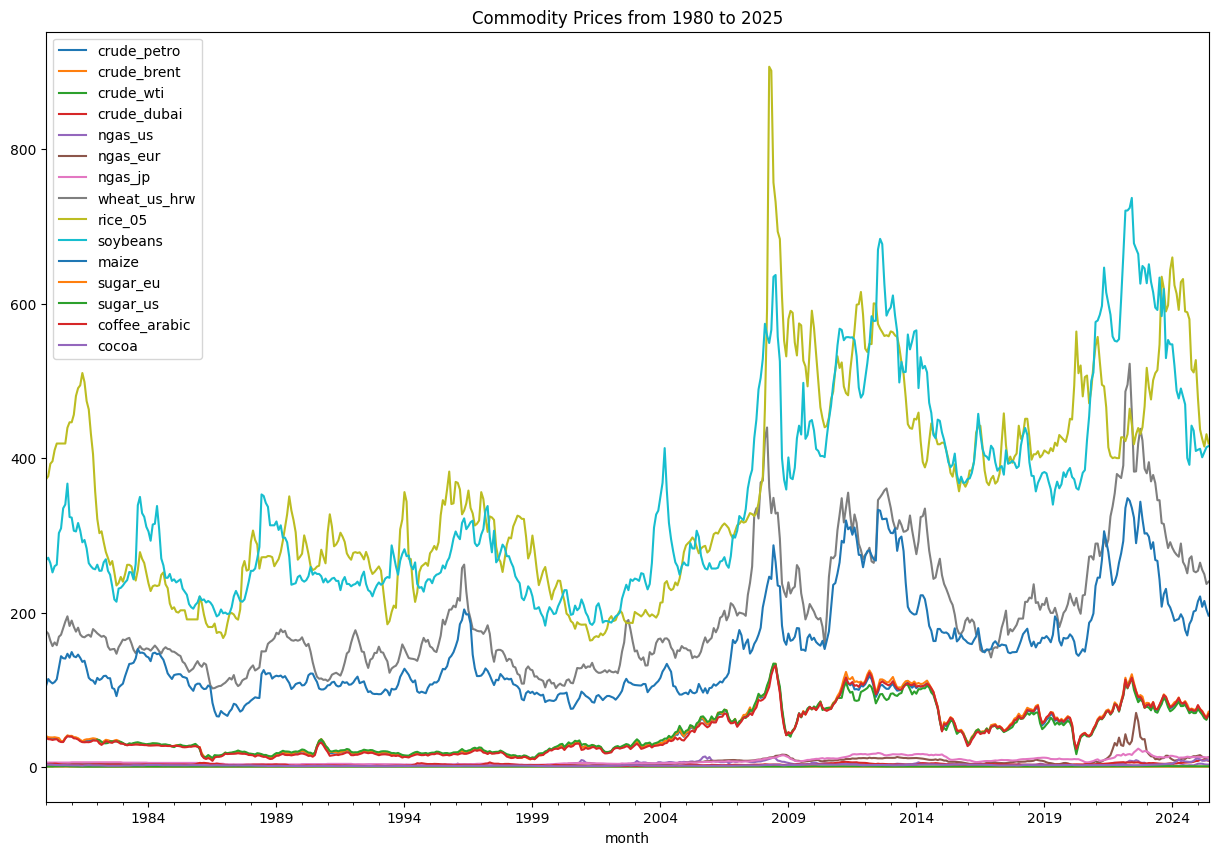

In [13]:
# I am going to plot the prices of the different oil and gas types to visualize the trends
comdata_long[cols].plot(figsize=(15, 10))
plt.title("Commodity Prices from 1980 to 2025")

Text(0.5, 1.0, 'Crude Petroleum Prices from 1980 to 2025')

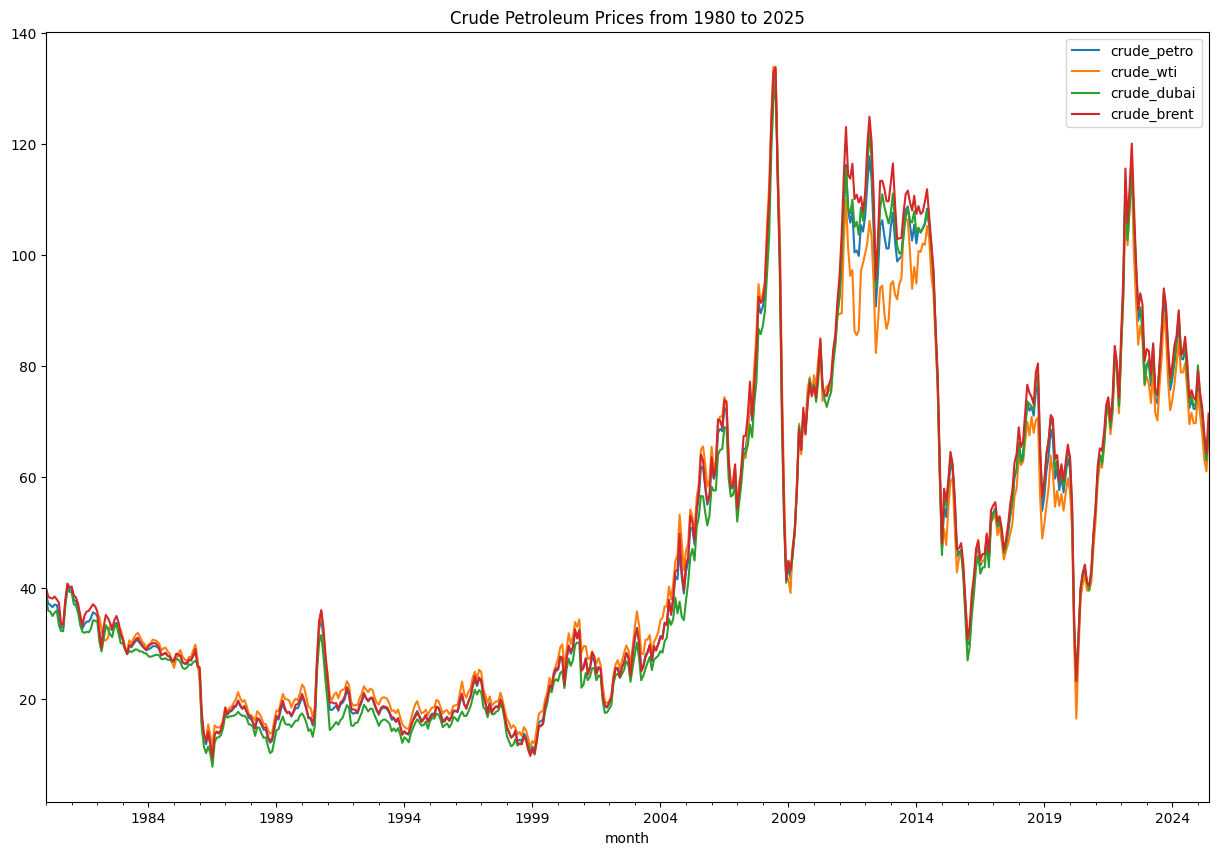

In [14]:
colscrude = [
    "crude_petro", "crude_wti", "crude_dubai", "crude_brent"]
comdata_long[colscrude].plot(figsize=(15, 10))
plt.title("Crude Petroleum Prices from 1980 to 2025")

Text(0.5, 1.0, 'Gas Prices from 1980 to 2025')

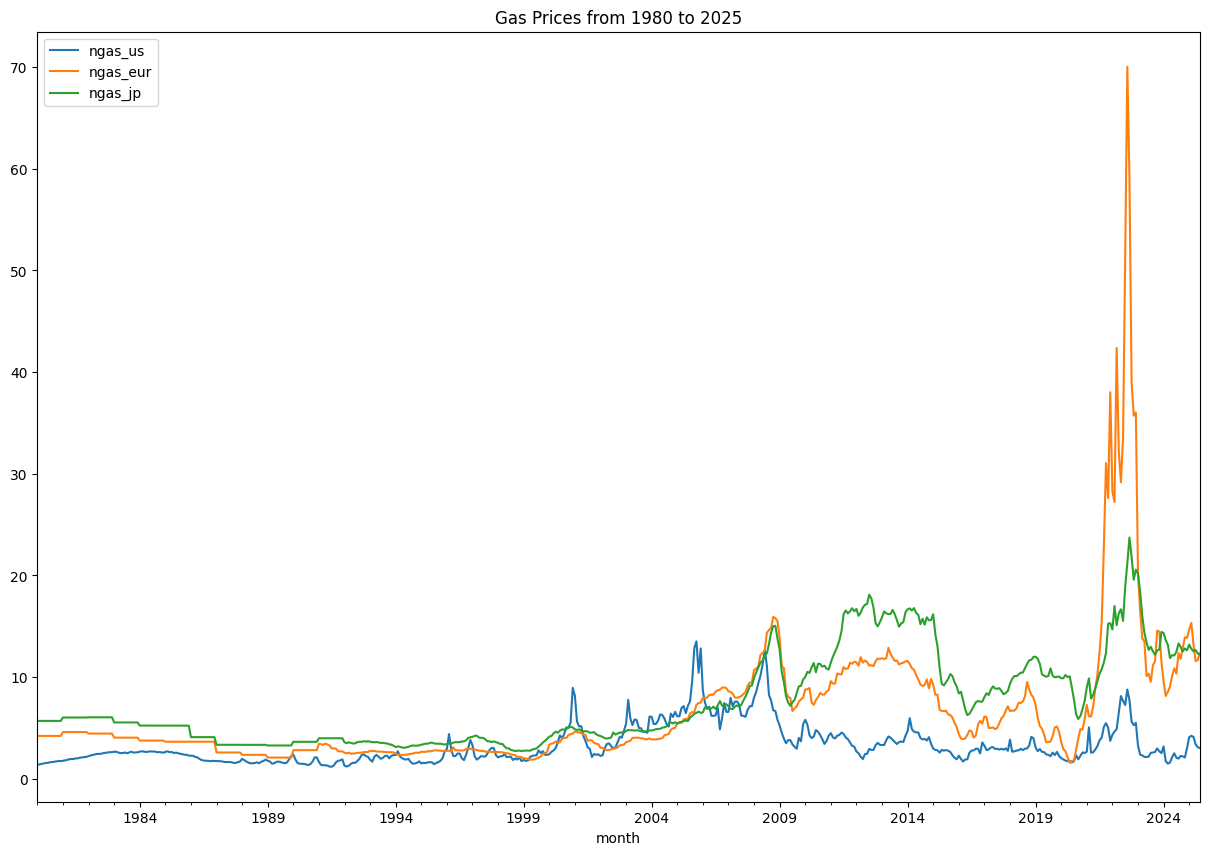

In [15]:
colsgs = [
    "ngas_us", "ngas_eur", "ngas_jp"]
comdata_long[colsgs].plot(figsize=(15, 10))
plt.title("Gas Prices from 1980 to 2025")

In [16]:
# The next steps are to make more graphs like box plots of different oil prices and gas prices to see the distribution of the data
# Then I will start analysing correlations between oil and gas prices and commodities like wheat, rice and soy
# Then I will do the simple regression model
# Then do the lagged regression model

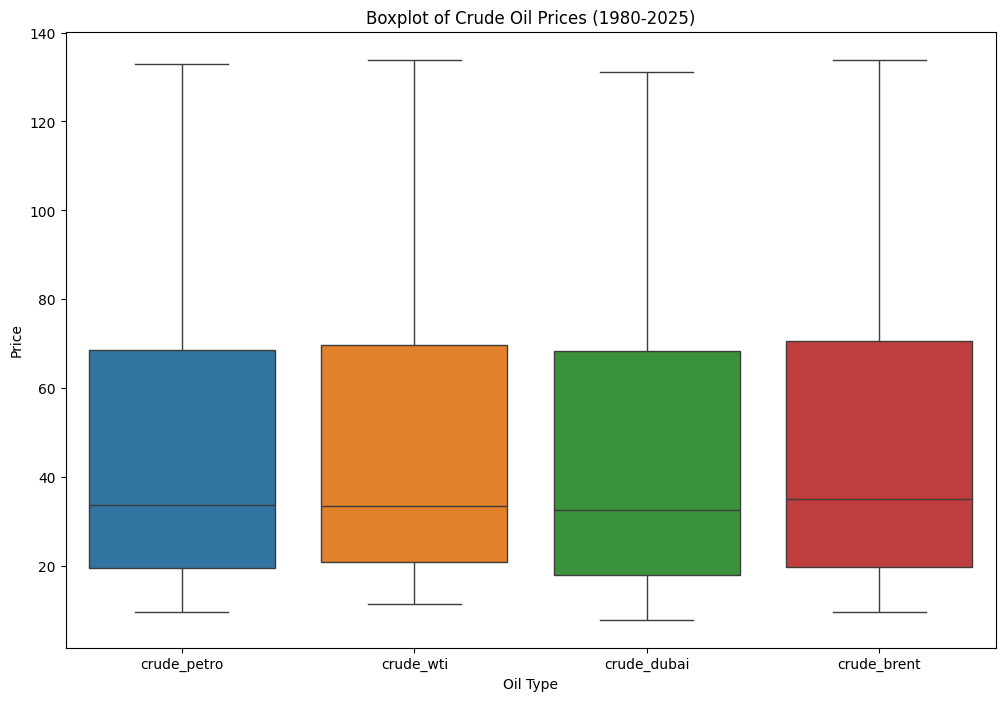

In [17]:
# Here I am goin got start with the box plots for the different oil prices
plt.figure(figsize=(12, 8))
sns.boxplot(data=comdata_long[colscrude])
plt.title("Boxplot of Crude Oil Prices (1980-2025)")
plt.ylabel("Price")
plt.xlabel("Oil Type")
plt.show()

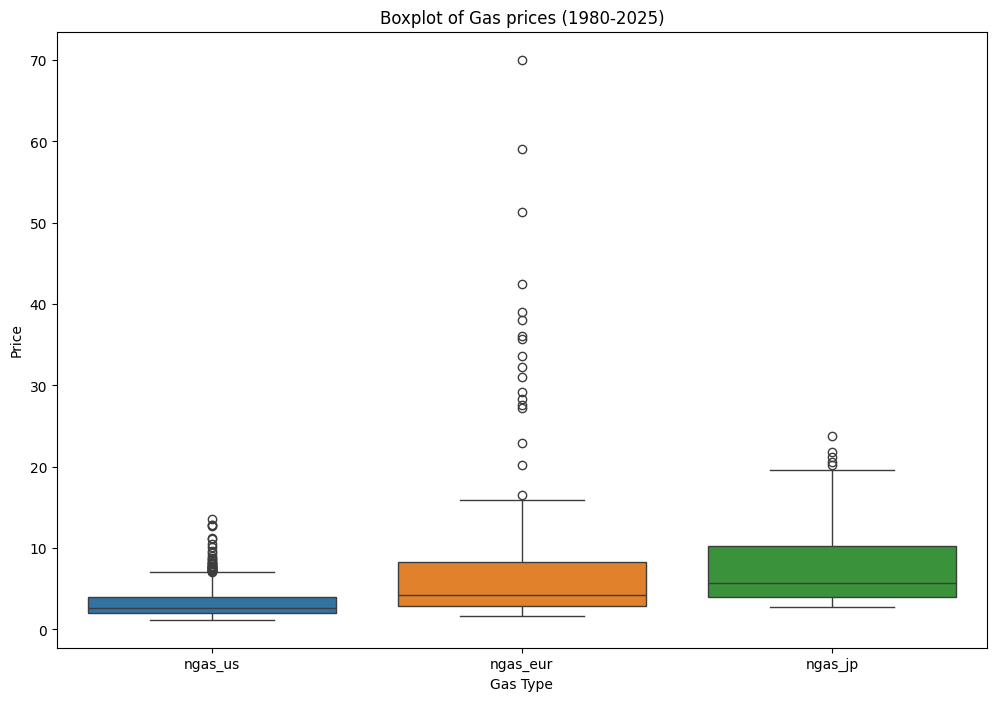

In [ ]:
# Here I am going to start with the box plots for the different gas prices
plt.figure(figsize=(12, 8))
sns.boxplot(data=comdata_long[colsgs])
plt.title("Boxplot of Gas prices (1980-2025)")
plt.ylabel("Price")
plt.xlabel("Gas Type")
plt.show()

In [ ]:
# The boxplots and graphs clearly show a trend among the different oil and gas types. While oil prices
#are very similar, gas prices are more volatile, for this analysis it will be interesting
#to compare the different gas prices with commodities, with the oil prices it seems only using one type 
#is enough to represent the trend of oil prices in general due to how similar they are
# Analising the effects of other oil types could be interesting for future studies, focusing on short term shocks
#on the European market for example

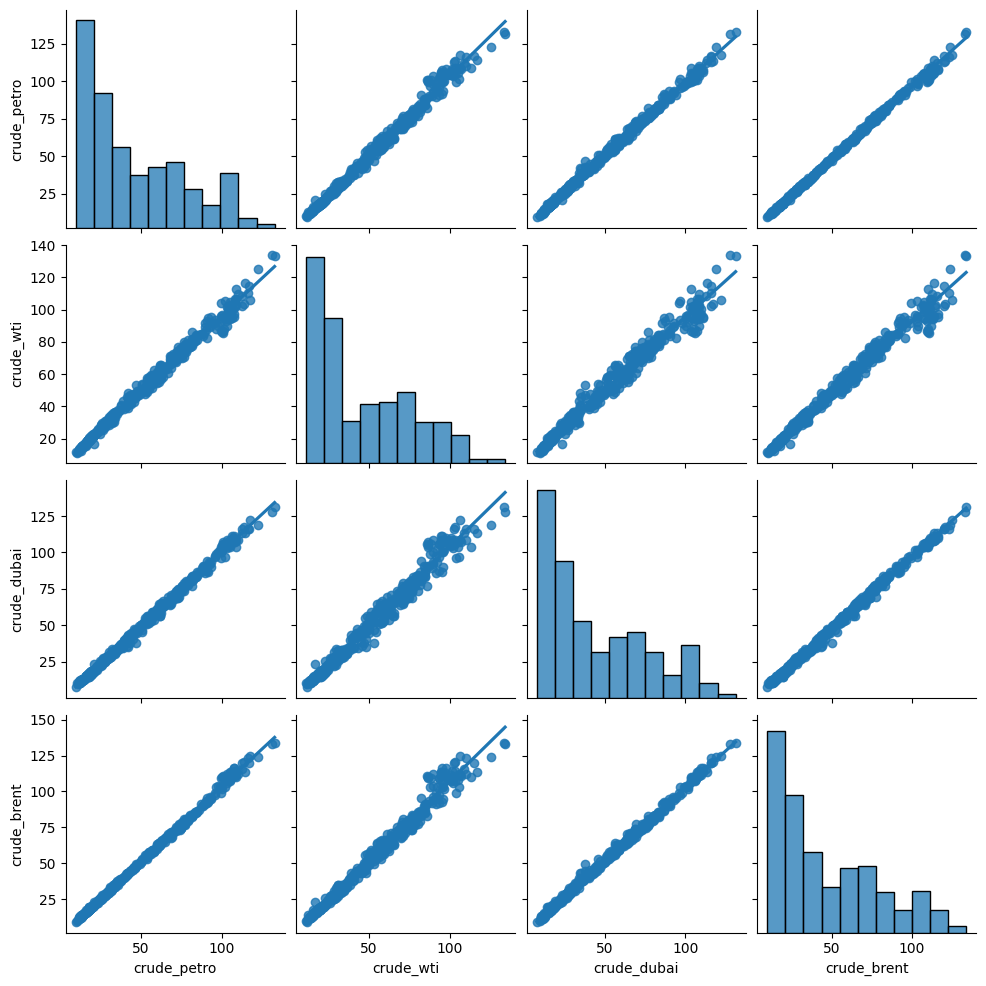

In [ ]:
# I will check the pairwise correlations between the different oil prices
sns.pairplot(comdata_long[colscrude], kind='reg', height=2.5)
# As we can see they are all strongly correlated

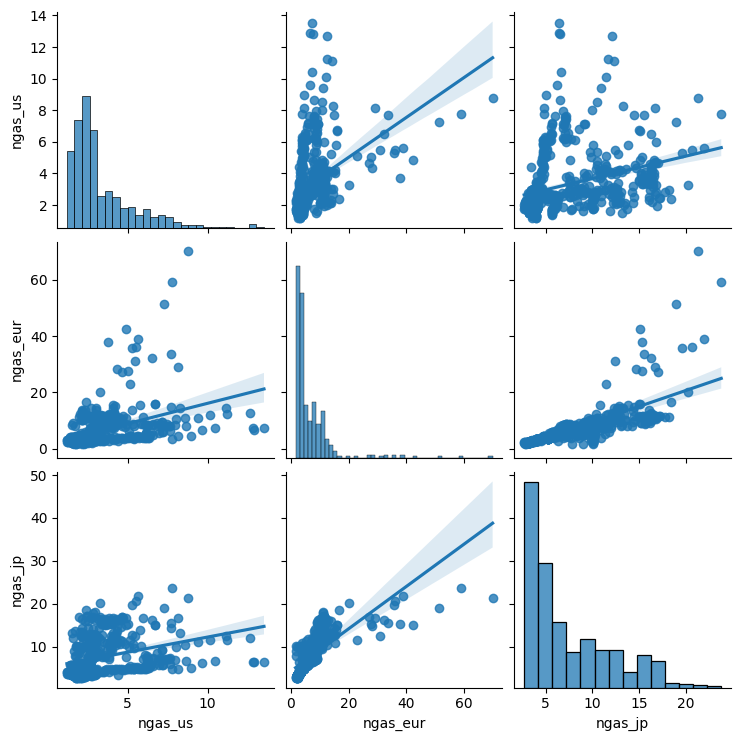

In [ ]:
# Here I am checking the correlations between gas types
sns.pairplot(comdata_long[colsgs], kind='reg', height=2.5)

# The pairwise correlations show that gas prices are also correlated, but not as strongly as oil prices
# This is expected as gas prices are more volatile and have different trends depending on the region

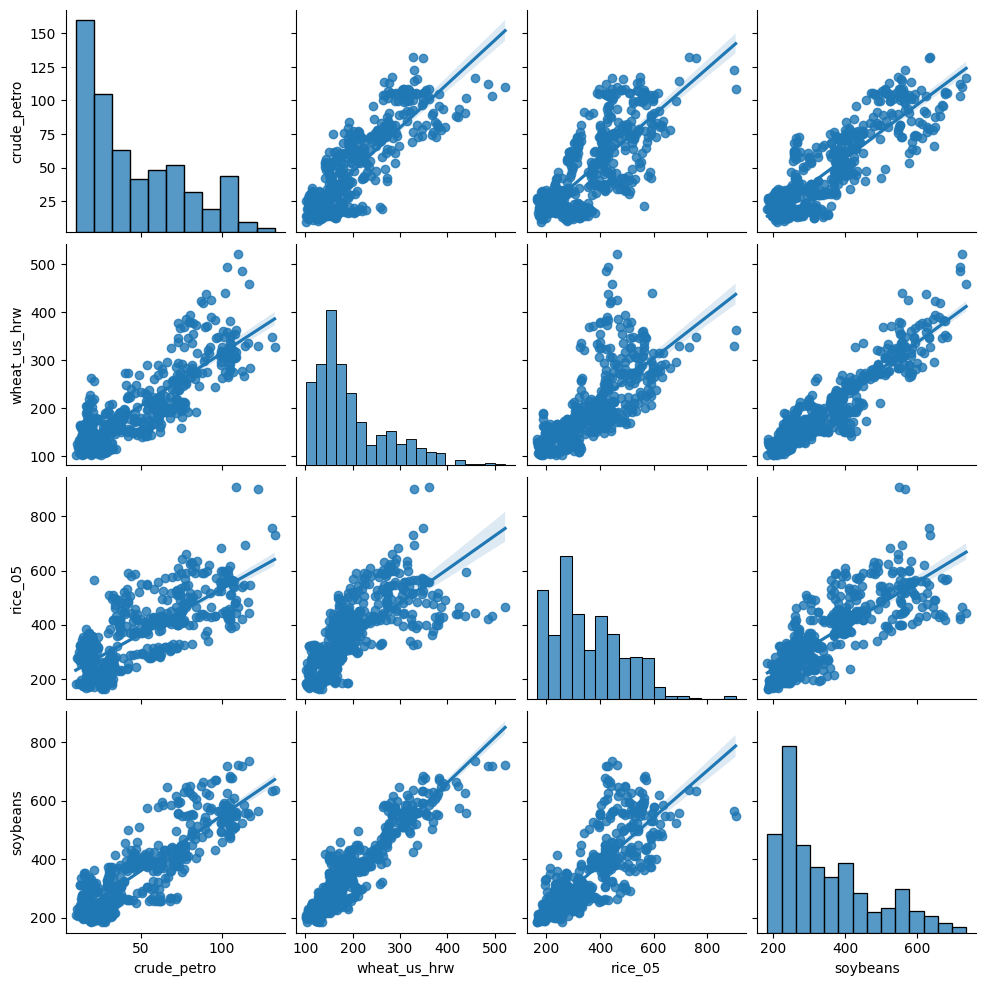

In [45]:
# Now let's check correlation between different oil types and cereals, starting with WTI
sns.pairplot(comdata_long[["crude_petro"] + ["wheat_us_hrw"] + ["rice_05"] + ["soybeans"]], kind='reg', height=2.5)

In [ ]:
## First linear regression using this data, let's start with crude oil and wheat
petrowheat = ols("wheat_us_hrw ~ crude_petro", data=comdata_long).fit()
print(petrowheat.summary())

                            OLS Regression Results                            
Dep. Variable:           wheat_us_hrw   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     1340.
Date:                Sat, 09 Aug 2025   Prob (F-statistic):          7.36e-149
Time:                        01:43:45   Log-Likelihood:                -2810.1
No. Observations:                 546   AIC:                             5624.
Df Residuals:                     544   BIC:                             5633.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      95.9486      3.276     29.289      

<Axes: xlabel='wheat_us_hrw', ylabel='crude_petro'>

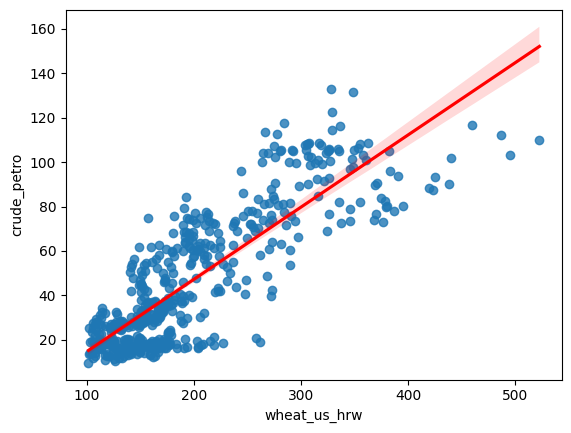

In [48]:
# Let's see the regplot of the regression
sns.regplot(x="wheat_us_hrw", y="crude_petro", data=comdata_long, line_kws={"color": "red"})

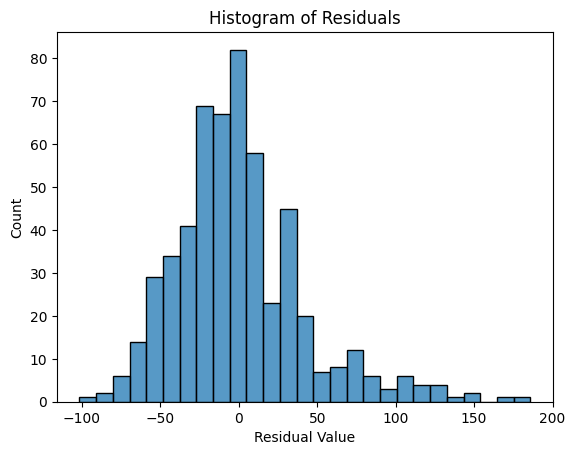

In [49]:
# Now check for the residuals of the regression 
residuals = petrowheat.resid
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()
# The residuals show a normal distribution, which is a good sign for the regression model 

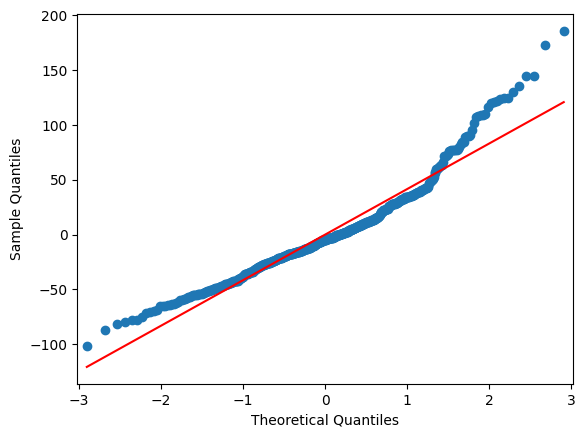

In [ ]:
# When checking the QQ plot of the residuals, we can see that they follow a mostly normal distribution 
fig = sm.qqplot(petrowheat.resid, line = 's')
plt.show()

In [47]:
## Let's check for WTI instead of petro 
wtiwheat = ols("wheat_us_hrw ~ crude_wti", data=comdata_long).fit()
print(wtiwheat.summary())

                            OLS Regression Results                            
Dep. Variable:           wheat_us_hrw   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     1215.
Date:                Sat, 09 Aug 2025   Prob (F-statistic):          3.62e-138
Time:                        01:44:30   Log-Likelihood:                -2706.8
No. Observations:                 522   AIC:                             5418.
Df Residuals:                     520   BIC:                             5426.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     90.4434      3.612     25.043      0.0

In [ ]:
# NEXT STEPS:
# CHECK FOR HOMOSCEDASTICITY
# CHECK FOR CORRELATIONS WITH OTHER CEREALS
# DEVELOP MODEL WITH ONLY GAS PRICES AND CEREALS, INCLUDING THE DIFFERENT TYPES OF GASES
# CONTINUE WITH MULTIVARIATE REGRESSION INCLUDING GAS PRICES AND OIL
# DEVELOP LAGGED REGRESSION MODEL
# DEVELOP SAME PROCESS FOR DIFFERENT TIMEFRAMES
# DEVELOP MORE MODELS WITH GAS AND STUDY FURTHER AS PRICES ARE MORE VOLATILE 

In [ ]:
### Multivariate analysis

## For the next regression let's include the natural gas prices in the regression model 
oil_gas_wheat = ols("wheat_us_hrw ~ crude_petro + ngas_us", data=comdata_long).fit()
print(oil_gas_wheat.summary())

                            OLS Regression Results                            
Dep. Variable:           wheat_us_hrw   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     681.3
Date:                Sat, 09 Aug 2025   Prob (F-statistic):          9.37e-149
Time:                        01:47:34   Log-Likelihood:                -2806.5
No. Observations:                 546   AIC:                             5619.
Df Residuals:                     543   BIC:                             5632.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     100.9407      3.750     26.918      

In [ ]:
# In this regression we can see that the gas prices have a significant effect on the wheat prices, but have a negative coefficient, 
#meaning that when gas prices go up, wheat prices go down
# This is an interesting result, as it shows that gas prices have a negative effect on wheat prices, which is not what we would expect
# We will further analyse this relationship in the following sections 